# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=6b5796553d7cb10be7fc8db8ed9b080be9cf1312877e16c5efe2cd5385ee4e71
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 55.4 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [1]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [2]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-10-30 10:32:37--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-10-30 10:32:38--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c9fe2292e0909cce2fd074aaa.dl.dropboxusercontent.com/cd/0/get/CGkhb6osUTOhLHnaxncgi8hRuiwsqx3IVkpKvtg78gM6UBgzQ1EKbFvVwa328f9s9rMKlllQPcaUZqIWjRbbN66kroTU_cL0DNHBvGnc7OzAyiofiwAE-agx3L-a7QsCo_-kUiCqnENl9larYg_iqKkb/file?dl=1# [following]
--2023-10-30 10:32:39--  https://uc3c9fe2292e0909cce2fd074aaa.dl.dropboxusercontent.com/cd/0/get/CGkhb6osUTOhLHnaxncgi8hRuiwsqx3IVkpKvtg78gM6UBgzQ1EKbFvVwa328f9s9rMKlllQPcaUZqIWjRbbN66kroTU_cL0DNHBv

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [19]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose(
    [
        #transforms.Resize(236),
        #transforms.CenterCrop(224),
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.4802334 , 0.44806594, 0.39750734), (0.22956188, 0.22626284, 0.22552611)),
    ]
)

val_transform = transforms.Compose(
    [
        #transforms.Resize(236),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.4802334 , 0.44806594, 0.39750734), (0.22956188, 0.22626284, 0.22552611)),
    ]
)

train_dataset = ImageFolder('content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=3)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=3)

Для первого задания используются следующие аугментации: ColorJitter, RandomHorizontalFlip, RandomRotation, ToTensor, Normalize (train) (аугментации с флиппами, изменениями цветов и ротациями подсмотрены в семинарских тетрадках); ToTensor, Normalize (test).

Для второго: Resize, CenterCrop, ToTensor, Normalize (train); Resize, CenterCrop, ToTensor, Normalize (test) (размер ресайза и кропа был выбран исходя из рекомендаций в описании модели: https://pytorch.org/vision/stable/models/generated/torchvision.models.convnext_tiny.html#torchvision.models.convnext_tiny)

Размер батча выбирался исходя из возможностей железа, т.к. большие батчи забивали память память гпу и обучение крашилось.

In [4]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [55]:
mn = []
s = []
for image in train_dataset:
    mn.append(image[0].mean([1,2]))
    s.append(image[0].std([1,2]))

Ячейка выше нужна для подсчета параметров Normalize для нашего датасета (считалось на трейне, тест нормализован по трейну).

### Посмотрим на картиночки

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


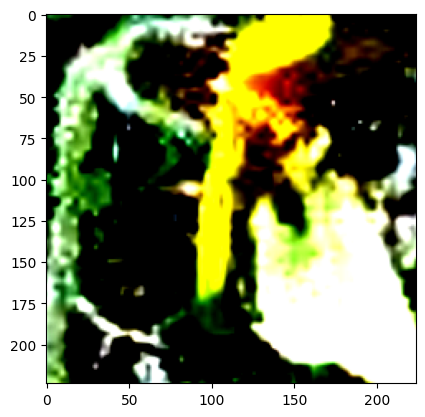

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


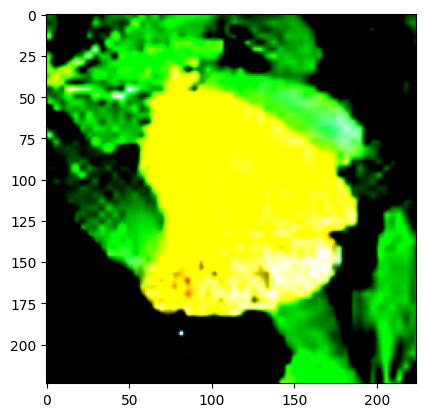

In [66]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [5]:
model = torchvision.models.convnext_small(weights=None, num_classes=200, input_size=(3, 64, 64))

Была выбрана модель из семейства ConvNext (small, т.к. выше плохо работают и на моем железе и в колабе).

In [6]:
model

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

### Тренировочный класс lightning

In [8]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=0.00001)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.9)
        return {"optimizer": optimizer, "lr_scheduler": scheduler}

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log('val_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)

Шедулер был подсмотрен здесь: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/
Параметры для шедулера подбирались вручную, исходя из наблюдений.
Оптимайзер был выбран Адам, т.к. он показал лучший результат в сравнении с SGD в одинаковых условиях.

In [9]:
device = "cuda"

model = model.to(device)
module = YourModule(model, learning_rate=0.0001)

lr был выбран исходя из наблюдений, т.к. больший lr приводил к тому, что лосс скакал и не уменьшался, а меньший приводил к очень медленному падению лосса. lr = 0.0001 в сочетании с шедулером показал наилучший результат.

In [17]:
trainer = pl.Trainer(accelerator="gpu", max_epochs=25)
trainer.fit(module, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | ConvNeXt         | 49.6 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
49.6 M    Trainable params
0         Non-trainable params
49.6 M    Total params
198.434   Total estimated model params size (MB)


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=25` reached.


Кол-во эпох было выбрано из-за сочетания времени/эффективности (в принципе можно было и больше, т.к. лосс продолжал падать, хоть и медленно, но времени не хватило).

### Валидация результатов задания

In [12]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy_all = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            preds = model(images)
            acc_batch = accuracy(preds, labels, task='multiclass', num_classes=200)
        accuracy_all += acc_batch
    accuracy_all = accuracy_all / len(test_dataloader)
    return accuracy_all.cpu()

Функция была чуть-чуть изменена (а именно - подсчет accuracy), т.к. в моделе ConvNext не предусмотрен подсчет accuracy отдельной функцией внутри модели.

In [13]:
model = model

accuracy = evaluate_task(model, val_dataloader)

print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:44<00:00,  7.06it/s]

Оценка за это задание составит 7.79 баллов


In [21]:
torch.save(model.state_dict(), '7.79_model.pth')

In [20]:
accuracy

tensor(0.3427)

In [11]:
model.load_state_dict(torch.load('7.79_model.pth'))

<All keys matched successfully>

Веса модели сохранены и приложены вместе с ноутбуком (обучение довольно долгое (несколько часов), поэтому имеет смысл загружать веса).

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [15]:
model = torchvision.models.convnext_tiny(weights=torchvision.models.ConvNeXt_Tiny_Weights.DEFAULT)

Модель выбрана из того же семейства, но меньшей размерности (из-за ресайза картинок нагрузка на гпу стала еще больше).

In [5]:
model

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

In [16]:
from torchvision.models.convnext import LayerNorm2d

model.classifier = nn.Sequential(
        LayerNorm2d((768,), eps=1e-06, elementwise_affine=True),
        nn.Flatten(start_dim=1, end_dim=-1),
        nn.Linear(in_features=768, out_features=200, bias=True),
  )

Заменили слой-классификатор под нужное нам кол-во классов.

### Тренировочный класс lightning

In [17]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.classifier.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log('val_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)

В данном задании шедулер не использовался, т.к. обучение проводилось в одну эпоху. Также изменен процесс тренировки (мы тренируем только последний слой (классификатор)).

In [21]:
device = "cuda"

module = YourModule(model, learning_rate=0.0001)

lr был оставлен такой же, как и в первом задании.

In [22]:
trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
trainer.fit(module, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | ConvNeXt         | 28.0 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
28.0 M    Trainable params
0         Non-trainable params
28.0 M    Total params
111.896   Total estimated model params size (MB)


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=1` reached.


Эпоха была всего одна, т.к. увеличение кол-ва эпох (даже при понижении lr) не привело к какому-либо прогрессу (а тренировка и так не быстрая: примерно 40 мин на эпоху в коллабе и около 2 часов на моем железе).

### Валидация результатов задания

In [21]:
model = model

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [03:50<00:00,  1.36it/s]

Оценка за это задание составит 8.79 баллов


In [20]:
torch.save(model.state_dict(), 'convnext_weights.pth')

Веса сохранены и приложены.

In [20]:
from torchvision.models.convnext import LayerNorm2d

model = torchvision.models.convnext_tiny(weights=None)

model.classifier = nn.Sequential(
        LayerNorm2d((768,), eps=1e-06, elementwise_affine=True),
        nn.Flatten(start_dim=1, end_dim=-1),
        nn.Linear(in_features=768, out_features=200, bias=True),
  )

model.load_state_dict(torch.load('convnext_weights.pth'))

<All keys matched successfully>

Ячейка выше - для загрузки весов (сюда сразу включена загрузка модели и замена классификатора).

При повторной валидации, не забудьте поменять аугментации, т.к. по дефолту выставлены аугментации для первого задания (подробнее написано выше, под ячейкой с ними).

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Экспериментов было крайне много (суммарно около 100 на оба задания), включали они в себя выбор модели (рассматривались AlexNet, resnet и, наконец, ConvNext), выбор lr и размера батча, кол-ва эпох, оптимайзера и и его параметров (weight_decay), шедулера и аугментаций (результаты с комментариями можно увидеть выше). Логи прогонов с самыми удачными результатами прикреплены (version_64 - для второго задания, version_84 - для первого).

Ниже приведены графики для этих прогонов.

In [5]:
task_1_pd = pd.read_csv('version_84/metrics.csv')
task_1_pd

,step,train_loss_step,epoch,val_loss_step,val_loss_epoch,train_loss_epoch
0,49,5.366143,0.0,NaN,NaN,NaN
1,99,4.886073,0.0,NaN,NaN,NaN
2,149,5.306435,0.0,NaN,NaN,NaN
3,199,5.161840,0.0,NaN,NaN,NaN
4,249,4.729815,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
9433,7822,NaN,NaN,3.242791,NaN,NaN
9434,7823,NaN,NaN,2.068118,NaN,NaN
9435,7824,NaN,NaN,1.750249,NaN,NaN
9436,78149,NaN,24.0,NaN,2.899942,NaN


Выгрузили таблицу для первого задания.

In [18]:
task_1_pd_train_loss = task_1_pd.copy(deep=True)[['step', 'train_loss_step']]
task_1_pd_train_loss.dropna(inplace=True)
task_1_pd_train_loss.set_index('step', inplace=True)
task_1_pd_train_loss

,train_loss_step
step,
49,5.366143
99,4.886073
149,5.306435
199,5.161840
249,4.729815
...,...
77949,1.992350
77999,2.338106
78049,2.332606


Создали сводную таблицу для лосса на трейне, в качестве индексов поставили шаги, удалили наны (наны образовывались во время валидации).

<AxesSubplot: xlabel='step'>

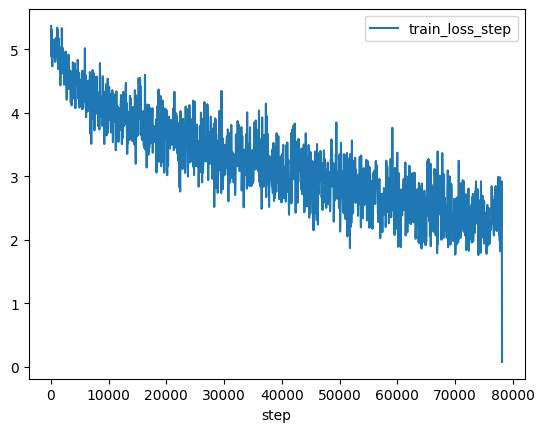

In [19]:
task_1_pd_train_loss.plot()

Построили график зависимости лосса от шага на трейне (как видим, наблюдаются сильные колебания, но лосс падает).

In [20]:
task_1_pd_val_loss = task_1_pd.copy(deep=True)[['step', 'val_loss_step']]
task_1_pd_val_loss.dropna(inplace=True)
task_1_pd_val_loss.set_index('step', inplace=True)
task_1_pd_val_loss

,val_loss_step
step,
0,4.110120
1,4.222076
2,4.238521
3,2.416122
4,3.233294
...,...
7820,2.532654
7821,2.574004
7822,3.242791


<AxesSubplot: xlabel='step'>

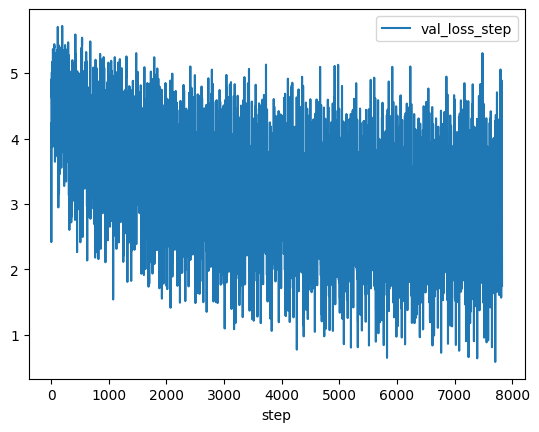

In [21]:
task_1_pd_val_loss.plot()

Сделали всё то же самое для валидации (колебания кажутся более сильными, т.к. сильно меньше шагов, но падение лосса четко прослеживается).

In [22]:
task_1_pd_train_loss_epoch = task_1_pd.copy(deep=True)[['step', 'train_loss_epoch']]
task_1_pd_train_loss_epoch.dropna(inplace=True)
task_1_pd_train_loss_epoch.set_index('step', inplace=True)
task_1_pd_train_loss_epoch

,train_loss_epoch
step,
3125,4.890443
6251,4.471806
9377,4.196510
12503,4.002495
15629,3.872297
18755,3.757433
21881,3.637655
25007,3.548564
28133,3.459833


<AxesSubplot: xlabel='step'>

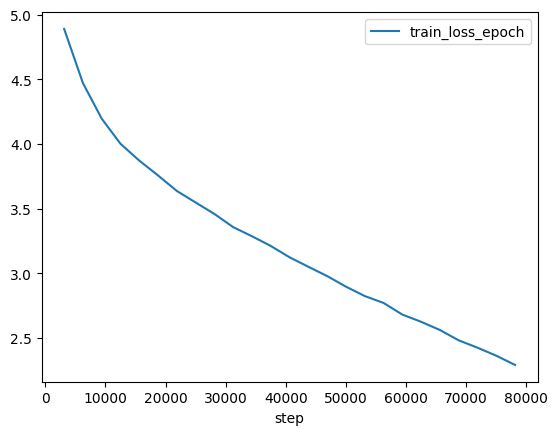

In [23]:
task_1_pd_train_loss_epoch.plot()

Сделали те же шаги для лосса на трейне по эпохам (на данном графике четко видно падение лосса по эпохам).

In [24]:
task_1_pd_val_loss_epoch = task_1_pd.copy(deep=True)[['step', 'val_loss_epoch']]
task_1_pd_val_loss_epoch.dropna(inplace=True)
task_1_pd_val_loss_epoch.set_index('step', inplace=True)
task_1_pd_val_loss_epoch

,val_loss_epoch
step,
3125,4.621073
6251,4.264176
9377,4.030540
12503,3.880442
15629,3.781666
18755,3.675811
21881,3.557905
25007,3.504591
28133,3.428076


<AxesSubplot: xlabel='step'>

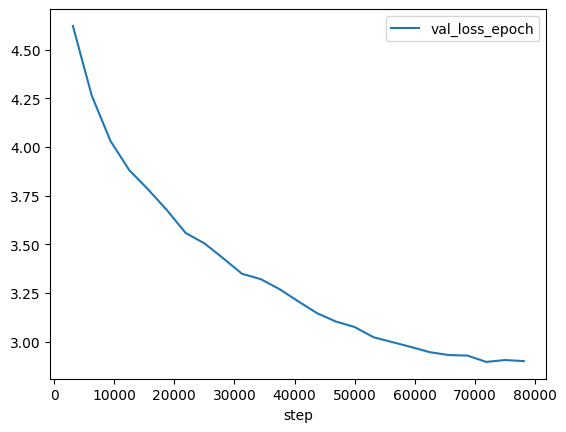

In [25]:
task_1_pd_val_loss_epoch.plot()

Теперь то же самое для валидации (опять же видно четкое падение, которое в конце замедляется, т.к. модель подходит к переобучению).

In [26]:
task_2_pd = pd.read_csv('version_64/metrics.csv')
task_2_pd

,epoch,step,train_loss_step,val_loss_step,val_loss_epoch,train_loss_epoch
0,0.0,49,1.695312,NaN,NaN,NaN
1,0.0,99,1.202004,NaN,NaN,NaN
2,0.0,149,2.004153,NaN,NaN,NaN
3,0.0,199,2.093139,NaN,NaN,NaN
4,0.0,249,1.140141,NaN,NaN,NaN
...,...,...,...,...,...,...
372,NaN,310,NaN,0.854303,NaN,NaN
373,NaN,311,NaN,0.857490,NaN,NaN
374,NaN,312,NaN,0.779146,NaN,NaN
375,0.0,3125,NaN,NaN,0.788356,NaN


Выгрузили таблицу для второго задания.

In [29]:
task_2_pd_train_loss = task_2_pd.copy(deep=True)[['step', 'train_loss_step']]
task_2_pd_train_loss.dropna(inplace=True)
task_2_pd_train_loss.set_index('step', inplace=True)
task_2_pd_train_loss

,train_loss_step
step,
49,1.695312
99,1.202004
149,2.004153
199,2.093139
249,1.140141
...,...
2899,1.097032
2949,1.678380
2999,1.133062


<AxesSubplot: xlabel='step'>

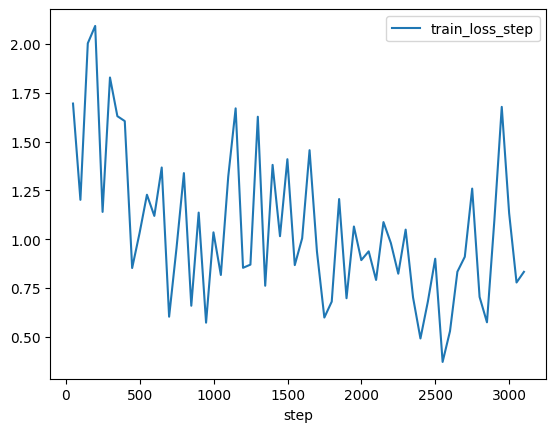

In [30]:
task_2_pd_train_loss.plot()

Построили график для лосса на трейне (не такой красивый, как в первом задании, т.к. эпоха всего одна).

In [31]:
task_2_pd_val_loss = task_2_pd.copy(deep=True)[['step', 'val_loss_step']]
task_2_pd_val_loss.dropna(inplace=True)
task_2_pd_val_loss.set_index('step', inplace=True)
task_2_pd_val_loss

,val_loss_step
step,
0,0.080460
1,0.702408
2,1.097593
3,0.046561
4,0.127999
...,...
308,0.742476
309,0.624985
310,0.854303


<AxesSubplot: xlabel='step'>

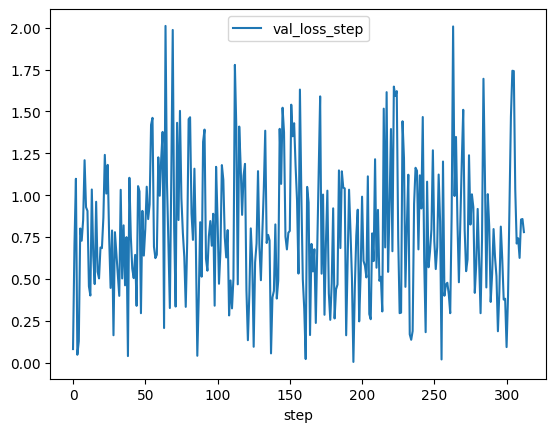

In [32]:
task_2_pd_val_loss.plot()

Сделали то же для валидации.

In [33]:
task_2_pd_train_loss_epoch = task_2_pd.copy(deep=True)[['step', 'train_loss_epoch']]
task_2_pd_train_loss_epoch.dropna(inplace=True)
task_2_pd_train_loss_epoch.set_index('step', inplace=True)
task_2_pd_train_loss_epoch

,train_loss_epoch
step,
3125,1.056179


In [34]:
task_2_pd_val_loss_epoch = task_2_pd.copy(deep=True)[['step', 'val_loss_epoch']]
task_2_pd_val_loss_epoch.dropna(inplace=True)
task_2_pd_val_loss_epoch.set_index('step', inplace=True)
task_2_pd_val_loss_epoch

,val_loss_epoch
step,
3125,0.788356


Ну и наконец средние значения для валидации и трейна по эпохе.